<a href="https://colab.research.google.com/github/TreeLiquid/Intro-to-ML/blob/main/Shigapov_4105_HW5_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import seaborn as sea
from matplotlib.colors import ListedColormap
import torch
import tensorflow
import torch.nn as nn
import torch.optim as optim

In [ ]:
#Preprocessing

Question 1

In [ ]:
#Tensors and Params
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.01 * t_u

params = torch.tensor([1.0,1.0,0.0], requires_grad= True)

In [ ]:
#Models (Linear, Non-Linear, Loss)
def linear(t_u, w, b):
  return w * t_u + b

def nonlinear(t_u, w2, w1, b):
  return w2 * t_u**2 + w1 * t_u + b

def lossfn(t_p, t_c):
  sqdiff = ((t_p - t_c)**2)
  return sqdiff.mean()

In [ ]:
#Non-Linear Model Depolyment
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

t_p = nonlinear(t_u, w2, w1, b)
print(t_p)

#Loss
loss = lossfn(t_p, t_c)
print("Loss = ", loss)

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])
Loss =  tensor(11709471.)


In [ ]:
#Linear Training Loop (LTL)
def LTL(n_epochs, optimizer, params, t_u, t_c):
  print(f'Learning Rate: {a}')
  for epoch in range(1, n_epochs+1):
    t_p = linear(t_u, *params)
    loss = lossfn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print ('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params, loss

In [ ]:
#NonLinear Training Loop (NLTL)
def NLTL(n_epochs, params, t_u, t_c, a):
  print(f'Learning Rate: {a}')
  for epoch in range(1, n_epochs+1):
    w1, w2, b = params
    t_p = nonlinear(t_u, w1, w2, b)
    loss = lossfn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print ('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params, loss

In [ ]:
#Learning Rates [a]
a = [0.1, 0.01, 0.001, 0.0001]

#ADAM Optimizer
#optA1 = optim.Adam([params], lr= i)

#Parameters
train_params = torch.zeros(len(a), 3)
train_loss = torch.zeros(len(a), 1)
linTrain_params = (1,2)
linTrain_loss = torch.zeros(1,1)

In [ ]:
#SGD Loop
print("Nonlinear SGD Training")
for i in a:
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer = optim.SGD([params], lr= i)
  print(f'\n')
  train_params[a.index(i)], train_loss[a.index(i)] = NLTL(
      n_epochs= 5000,
      params= params,
      t_u= t_un,
      t_c= t_c,
      a= i
  )

Nonlinear SGD Training


Learning Rate: 0.1
Epoch 500, Loss 2.108456
Epoch 1000, Loss 2.090728
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090721
Epoch 3000, Loss 2.090719
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720


Learning Rate: 0.01
Epoch 500, Loss 26.266186
Epoch 1000, Loss 12.949670
Epoch 1500, Loss 6.968258
Epoch 2000, Loss 4.281574
Epoch 2500, Loss 3.074787
Epoch 3000, Loss 2.532740
Epoch 3500, Loss 2.289264
Epoch 4000, Loss 2.179901
Epoch 4500, Loss 2.130778
Epoch 5000, Loss 2.108713


Learning Rate: 0.001
Epoch 500, Loss 58.822189
Epoch 1000, Loss 48.348232
Epoch 1500, Loss 44.396774
Epoch 2000, Loss 41.118404
Epoch 2500, Loss 38.115955
Epoch 3000, Loss 35.345898
Epoch 3500, Loss 32.788918
Epoch 4000, Loss 30.428556
Epoch 4500, Loss 28.249678
Epoch 5000, Loss 26.238340


Learning Rate: 0.0001
Epoch 500, Loss 138.825058
Epoch 1000, Loss 118.428955
Epoch 1500, Loss 102.817139
Epoch 2000, Los

In [ ]:
print(train_params)

tensor([[ 28.3420,  24.7210, -10.6403],
        [ 27.9050,  24.3412, -10.3017],
        [ 11.6079,  11.5393,   1.5983],
        [  3.7440,   4.8014,   4.9612]], grad_fn=<CopySlices>)


In [ ]:
#ADAM Loop
print("Nonlinear ADAM Training")
for i in a:
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer = optim.Adam([params], lr= i)
  print(f'\n')
  train_params[a.index(i)], train_loss[a.index(i)] = NLTL(
      n_epochs= 5000,
      params= params,
      t_u= t_un,
      t_c= t_c,
      a= i
  )

Nonlinear ADAM Training


Learning Rate: 0.1
Epoch 500, Loss 7.720606
Epoch 1000, Loss 2.183957
Epoch 1500, Loss 2.105043
Epoch 2000, Loss 2.103428
Epoch 2500, Loss 2.101665
Epoch 3000, Loss 2.099716
Epoch 3500, Loss 2.097688
Epoch 4000, Loss 2.095724
Epoch 4500, Loss 2.093984
Epoch 5000, Loss 2.092600


Learning Rate: 0.01
Epoch 500, Loss 57.949375
Epoch 1000, Loss 40.551365
Epoch 1500, Loss 33.974369
Epoch 2000, Loss 27.274963
Epoch 2500, Loss 20.752810
Epoch 3000, Loss 14.940594
Epoch 3500, Loss 10.199280
Epoch 4000, Loss 6.687758
Epoch 4500, Loss 4.367293
Epoch 5000, Loss 3.038020


Learning Rate: 0.001
Epoch 500, Loss 146.404602
Epoch 1000, Loss 129.578949
Epoch 1500, Loss 114.772308
Epoch 2000, Loss 101.786652
Epoch 2500, Loss 90.459236
Epoch 3000, Loss 80.654350
Epoch 3500, Loss 72.255226
Epoch 4000, Loss 65.156609
Epoch 4500, Loss 59.257385
Epoch 5000, Loss 54.453419


Learning Rate: 0.0001
Epoch 500, Loss 163.438293
Epoch 1000, Loss 161.446915
Epoch 1500, Loss 159.478012
Epoch

In [ ]:
#Linear Model
linParams = torch.tensor([1.0, 0.0], requires_grad=True)
a = 0.1
optimizer = optim.Adam([linParams], lr= a)
linTrain_params, linTrain_loss = LTL(
    n_epochs= 5000,
    optimizer= optimizer,
    params= linParams,
    t_u= t_un,
    t_c= t_c
  )

Learning Rate: 0.1
Epoch 500, Loss 28.605974
Epoch 1000, Loss 8.407223
Epoch 1500, Loss 3.493775
Epoch 2000, Loss 2.951920
Epoch 2500, Loss 2.927988
Epoch 3000, Loss 2.927646
Epoch 3500, Loss 2.927642
Epoch 4000, Loss 2.927643
Epoch 4500, Loss 2.927643
Epoch 5000, Loss 2.927644


In [ ]:
#Getting the best
print(train_params)

bestParams = train_params[0]
NL_tp = nonlinear(t_un, *bestParams)
lin_tp = linear(t_un, *linParams)

tensor([[ 29.6354,  23.3667, -10.3189],
        [ 27.2414,  19.8351,  -7.6692],
        [  5.4165,   5.2978,   4.0355],
        [  1.4952,   1.4946,   0.4935]], grad_fn=<CopySlices>)


In [ ]:

print(NL_tp)

tensor([ 1.8000, 12.0036, 13.3188, 28.6967, 12.2301,  8.1939,  1.0082, -3.8165,
         7.9329, 14.6061, 19.5290], grad_fn=<AddBackward0>)


Text(0.5, 1.0, 'Comparison Graph')

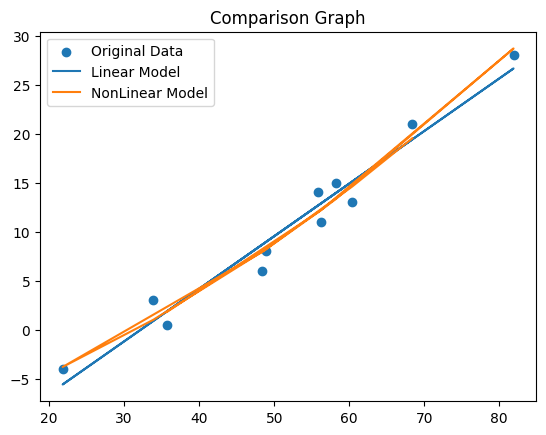

In [ ]:
#Plot the Original Data
plt.scatter(t_u, t_c, label = "Original Data")

#Plot the linear model
plt.plot(t_u, lin_tp.detach().numpy(), label= 'Linear Model')

#Plot the nonlinear model
plt.plot(t_u, NL_tp.detach().numpy(), label= 'NonLinear Model')
plt.legend()
plt.title("Comparison Graph")